# MACHINE LEARNING with PYCARET

Hi guys, welcome to Tirenaz Academy. In this notebook, 
I'm goint to talk about PyCaret library.

---
In short, the notebooks covers the following topics:
- Data preprocessing
- Buiding the model
- Model selection
- Model tuning
- Model evaluation
- Model finalisation
---
Happy Learning 😀

## Loading the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,42,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,53,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,53,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,48,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,53,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1


In [4]:
df.shape

(200, 16)

## Data Preprocessing

In [5]:
data = df.sample(frac = 0.95, random_state=0)

In [6]:
data.head()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
18,47,2,130,80,67,147,334,1,8,3,138,85,303,147,2,0
170,64,4,104,74,63,146,300,3,8,1,130,80,249,143,0,0
107,45,3,130,100,72,168,252,5,3,1,150,100,234,176,0,0
98,49,4,120,80,63,142,283,3,8,5,116,88,311,160,0,1
177,22,4,120,90,69,192,240,5,8,1,150,105,269,201,0,0


In [7]:
data_unseen = df.drop(data.index)

In [8]:
data.reset_index(inplace=True, drop = True)

In [9]:
data.head()

,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,47,2,130,80,67,147,334,1,8,3,138,85,303,147,2,0
1,64,4,104,74,63,146,300,3,8,1,130,80,249,143,0,0
2,45,3,130,100,72,168,252,5,3,1,150,100,234,176,0,0
3,49,4,120,80,63,142,283,3,8,5,116,88,311,160,0,1
4,22,4,120,90,69,192,240,5,8,1,150,105,269,201,0,0


In [10]:
data_unseen.reset_index(inplace=True, drop = True)

In [11]:
data["DEATH"].value_counts()

0    131
1     59
Name: DEATH, dtype: int64

In [12]:
from pycaret.classification import * 

In [13]:
from imblearn.over_sampling import RandomOverSampler

In [14]:
model = setup(data=data,
             target = "DEATH",
             normalize = True,
             normalize_method="minmax",
             train_size = 0.8,
             fix_imbalance= True,
             fix_imbalance_method=RandomOverSampler(),
             session_id = 0)

,Description,Value
0,session_id,0
1,Target,DEATH
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(190, 16)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


## Building the Model

In [15]:
knn = create_model("knn")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5000,0.5636,0.8000,0.3636,0.5000,0.1233,0.1636
1,0.3750,0.4500,0.3333,0.2500,0.2857,-0.2500,-0.2582
2,0.5333,0.4200,0.2000,0.2500,0.2222,-0.1053,-0.1066
3,0.5333,0.5400,0.2000,0.2500,0.2222,-0.1053,-0.1066
4,0.4667,0.4700,0.4000,0.2857,0.3333,-0.0909,-0.0945
5,0.5333,0.5700,0.2000,0.2500,0.2222,-0.1053,-0.1066
6,0.6000,0.6400,0.8000,0.4444,0.5714,0.2500,0.2887
7,0.4667,0.4500,0.4000,0.2857,0.3333,-0.0909,-0.0945
8,0.8000,0.9000,1.0000,0.6250,0.7692,0.6087,0.6614


In [16]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.6545,0.8000,0.5714,0.6667,0.4754,0.4927
1,0.6250,0.6167,0.5000,0.5000,0.5000,0.2000,0.2000
2,0.6667,0.8000,0.8000,0.5000,0.6154,0.3478,0.3780
3,0.6000,0.6200,0.4000,0.4000,0.4000,0.1000,0.1000
4,0.6667,0.6400,0.4000,0.5000,0.4444,0.2105,0.2132
5,0.6000,0.5200,0.6000,0.4286,0.5000,0.1818,0.1890
6,0.5333,0.6600,0.2000,0.2500,0.2222,-0.1053,-0.1066
7,0.6000,0.5600,0.4000,0.4000,0.4000,0.1000,0.1000
8,0.7333,0.7600,0.8000,0.5714,0.6667,0.4545,0.4725


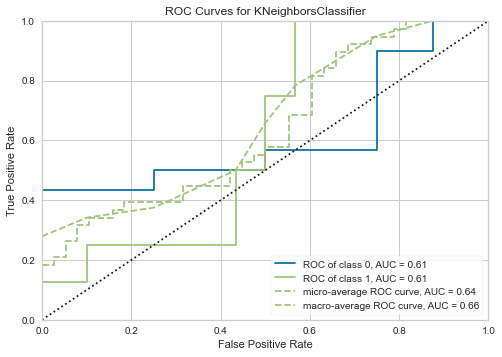

In [17]:
plot_model(tuned_knn, plot = "auc")

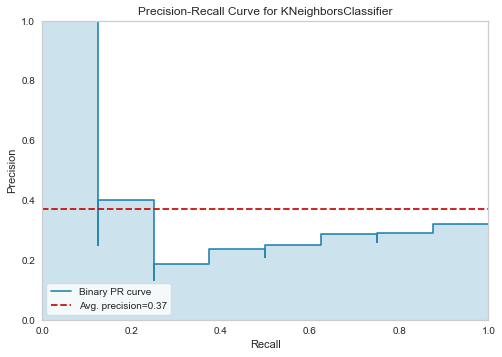

In [18]:
plot_model(tuned_knn, plot="pr")

In [19]:
predict_model(tuned_knn)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.5263,0.6125,0.5000,0.2222,0.3077,0.0229,0.0272


,AGE_50,SBP_50,DBP_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,MD_50_1,...,IHD_DX_2,IHD_DX_3,IHD_DX_4,IHD_DX_5,IHD_DX_6,IHD_DX_7,IHD_DX_9,DEATH,Label,Score
0,0.387755,0.304348,0.701299,0.277778,0.197531,0.414286,0.430769,0.254545,0.311594,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.6947
1,0.551020,0.217391,0.545455,0.341270,0.222222,0.535714,0.246154,0.554545,0.376812,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7062
2,0.469388,0.217391,0.545455,0.730159,0.419753,0.485714,0.338462,0.254545,0.652174,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.5071
3,0.122449,-0.060870,0.285714,0.547619,0.419753,0.300000,0.246154,0.727273,0.710145,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7558
4,0.387755,0.600000,0.935065,1.079365,0.222222,0.535714,0.538462,0.500000,0.623188,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.5983
5,0.551020,0.130435,0.415584,0.166667,0.180247,0.392857,0.230769,0.227273,0.137681,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5885
6,0.734694,0.260870,0.480519,0.103175,0.491358,0.500000,0.307692,0.477273,0.159420,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7576
7,0.510204,0.304348,0.675325,0.722222,0.222222,0.428571,0.461538,0.250000,0.434783,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.5543
8,0.714286,0.260870,0.675325,0.428571,0.259259,0.714286,0.523077,0.486364,0.224638,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.5986
9,0.510204,0.217391,0.571429,0.492064,0.271605,0.500000,0.369231,0.409091,0.442029,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.5746


In [20]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6767,0.7313,0.3733,0.5067,0.4120,0.2181,0.2319,0.0410
et,Extra Trees Classifier,0.6700,0.6782,0.3167,0.4817,0.3549,0.1720,0.1790,0.0350
lightgbm,Light Gradient Boosting Machine,0.6646,0.6855,0.4500,0.5083,0.4616,0.2252,0.2339,0.0100
dummy,Dummy Classifier,0.6646,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0040
ada,Ada Boost Classifier,0.6637,0.6613,0.5100,0.5100,0.4874,0.2481,0.2565,0.0200
lr,Logistic Regression,0.6575,0.7005,0.5900,0.4892,0.5267,0.2635,0.2747,0.4380
svm,SVM - Linear Kernel,0.6446,0.0000,0.3967,0.4761,0.4061,0.1701,0.1824,0.0050
qda,Quadratic Discriminant Analysis,0.6438,0.5892,0.4167,0.5271,0.4324,0.1864,0.2034,0.0060
ridge,Ridge Classifier,0.6375,0.0000,0.5500,0.4683,0.4932,0.2191,0.2293,0.0050
gbc,Gradient Boosting Classifier,0.6371,0.6521,0.3933,0.5105,0.4112,0.1671,0.1827,0.0180


In [21]:
tuned_best = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.7545,0.6000,0.7500,0.6667,0.5385,0.5449
1,0.7500,0.7667,0.5000,0.7500,0.6000,0.4286,0.4472
2,0.7333,0.7200,0.6000,0.6000,0.6000,0.4000,0.4000
3,0.8000,0.8600,0.6000,0.7500,0.6667,0.5263,0.5330
4,0.5333,0.6700,0.8000,0.4000,0.5333,0.1600,0.2000
5,0.6667,0.8000,0.6000,0.5000,0.5455,0.2857,0.2887
6,0.8667,0.9600,0.8000,0.8000,0.8000,0.7000,0.7000
7,0.8000,0.8400,0.8000,0.6667,0.7273,0.5714,0.5774
8,0.6667,0.5700,0.6000,0.5000,0.5455,0.2857,0.2887


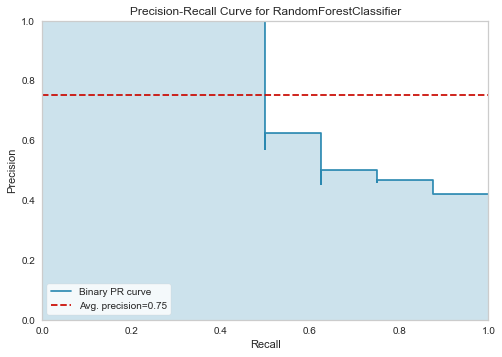

In [22]:
plot_model(tuned_best, plot ="pr")

In [23]:
final_best = finalize_model(tuned_best)

In [24]:
predict_model(final_best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8158,0.8688,0.6250,0.5556,0.5882,0.4701,0.4715


,AGE_50,SBP_50,DBP_50,WT_50,CHOL_50,SBP_62,DBP_62,CHOL_62,WT_62,MD_50_1,...,IHD_DX_2,IHD_DX_3,IHD_DX_4,IHD_DX_5,IHD_DX_6,IHD_DX_7,IHD_DX_9,DEATH,Label,Score
0,0.387755,0.304348,0.701299,0.277778,0.197531,0.414286,0.430769,0.254545,0.311594,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7080
1,0.551020,0.217391,0.545455,0.341270,0.222222,0.535714,0.246154,0.554545,0.376812,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6679
2,0.469388,0.217391,0.545455,0.730159,0.419753,0.485714,0.338462,0.254545,0.652174,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7098
3,0.122449,-0.060870,0.285714,0.547619,0.419753,0.300000,0.246154,0.727273,0.710145,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7165
4,0.387755,0.600000,0.935065,1.079365,0.222222,0.535714,0.538462,0.500000,0.623188,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.7134
5,0.551020,0.130435,0.415584,0.166667,0.180247,0.392857,0.230769,0.227273,0.137681,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.6679
6,0.734694,0.260870,0.480519,0.103175,0.491358,0.500000,0.307692,0.477273,0.159420,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7552
7,0.510204,0.304348,0.675325,0.722222,0.222222,0.428571,0.461538,0.250000,0.434783,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0.6974
8,0.714286,0.260870,0.675325,0.428571,0.259259,0.714286,0.523077,0.486364,0.224638,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0.7552
9,0.510204,0.217391,0.571429,0.492064,0.271605,0.500000,0.369231,0.409091,0.442029,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.6974


## Model Evaluation

In [25]:
predict_model(final_best, data = data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6000,0.5600,0.4000,0.6667,0.5000,0.2000,0.2182


,AGE_50,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH,Label,Score
0,40,3,120,80,69,148,185,3,8,3,110,64,241,152,2,1,0,0.7080
1,54,1,141,100,65,171,363,3,7,2,180,100,276,154,2,1,1,0.7552
2,52,4,145,90,66,183,289,3,7,3,150,88,299,143,6,0,1,0.5005
3,34,2,130,90,61,120,317,2,5,2,122,68,248,118,6,0,0,0.7111
4,51,3,138,100,72,208,296,3,7,1,135,95,286,199,8,0,0,0.5276
5,43,1,120,85,70,134,220,3,8,4,140,85,354,141,0,1,0,0.7044
6,25,1,110,80,74,190,235,3,8,2,116,90,280,210,0,1,0,0.7165
7,61,1,150,90,69,142,247,3,6,2,150,90,218,174,0,1,1,0.7498
8,36,3,135,80,69,155,290,3,8,2,120,84,238,157,0,0,0,0.7111
9,49,2,110,75,70,141,150,3,8,4,170,98,221,147,0,0,0,0.5451


Follow us on [YouTube](https://youtube.com/c/tirendazacademy), [twitter](https://twitter.com/tirendazacademy), [GitHub](https://github.com/tirendazacademy), [Medium](https://tirendazacademy.medium.com) 😀😎